In [1]:
import pandas as pd
from matplotlib import pyplot as mp
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from math import sqrt

In [2]:
dataset = pd.read_excel('DATASET KNN.xlsx')

In [3]:
dataset

,MTK,Produktif,Keterangan
0,79.0,81.833333,SI
1,78.5,87.333333,IF
2,78.5,85.166667,IF
3,79.0,84.500000,IF
4,79.0,83.500000,IF
5,78.5,80.500000,SI
6,80.0,88.000000,IF
7,79.0,88.333333,IF
8,79.5,83.833333,IF
9,82.0,79.830000,IF


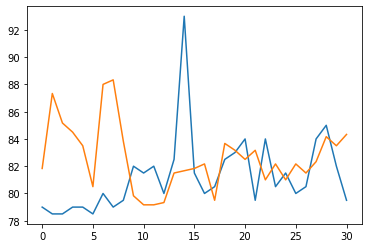

In [4]:
mp.plot(dataset.MTK)
mp.plot(dataset.Produktif)
mp.show()

In [5]:
dataset.shape

(31, 3)

In [6]:
dataset.describe()

,MTK,Produktif
count,31.000000,31.000000
mean,81.290323,82.639785
std,2.845389,2.388405
min,78.500000,79.166667
25%,79.500000,81.250000
50%,80.500000,82.166667
75%,82.250000,83.751667
max,93.000000,88.333333


In [7]:
#Replace IF = 0, SI = 1

rep_if_si = ['Keterangan']

for column in rep_if_si:
    dataset[column] = dataset[column].replace('IF', 0)
    dataset[column] = dataset[column].replace('SI', 1)

In [ ]:
Lbl_Keterangan = dataset['Keterangan'].copy()

In [8]:
#menghitung jarak euclidean
jarak = 0.0
x1 = dataset.MTK[30]
y1 = dataset.Produktif[30]
x2 = dataset.MTK
y2 = dataset.Produktif
list_jarak = list()

for i in range(30):
    jarak = ((x2[i] - x1)**2 + (y2[i] - y1)**2)
    akr = sqrt(jarak)
    list_jarak.append(akr)
    dt_jarak = pd.DataFrame(list_jarak)
    
print(dt_jarak)

            0
0    2.546241
1    3.165440
2    1.303845
3    0.528110
4    0.968969
5    3.958396
6    3.703903
7    4.034436
8    0.496667
9    5.147815
10   5.537148
11   5.736725
12   5.021621
13   4.124185
14  13.760209
15   3.198960
16   2.220363
17   4.932433
18   3.071742
19   3.687221
20   4.857870
21   1.163333
22   5.598116
23   2.383277
24   3.884443
25   2.220363
26   3.001483
27   4.923076
28   5.502425
29   2.634179


In [13]:
dataset.insert(3, 'Jarak', dt_jarak)

In [14]:
dataset

,MTK,Produktif,Keterangan,Jarak
0,79.0,81.833333,1.0,2.546241
1,78.5,87.333333,0.0,3.165440
2,78.5,85.166667,0.0,1.303845
3,79.0,84.500000,0.0,0.528110
4,79.0,83.500000,0.0,0.968969
5,78.5,80.500000,1.0,3.958396
6,80.0,88.000000,0.0,3.703903
7,79.0,88.333333,0.0,4.034436
8,79.5,83.833333,0.0,0.496667
9,82.0,79.830000,0.0,5.147815
